# PyTorch - WPROWADZENIE

## Wprowadzenie do tensorów

In [3]:
import torch  # pytorch
import numpy as np

+ Tensory w PyTorchu to specjalne struktury danych które przypominają tablice/macierze. Używamy ich do przechowywania wejśc/wyjść z sieci jak również wag modelu.
+ Tensory przypominają swoją budową tablice numpy https://numpy.org/, z zasadniczą różnicą ktorą jest łatwa możliwość przechowywania i operowania na tensorach na kartach graficznych 

### Tworzenie tensorów

Tensory mogą być tworzone w różny sposób:
1. Ze standardowych tablic

In [4]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

+ I rzutowane na float:

In [5]:
x_data.float()

tensor([[1., 2.],
        [3., 4.]])

2. Na podstawie tablic numpy

In [6]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

In [7]:
torch.Tensor(np_array)

tensor([[1., 2.],
        [3., 4.]])

3. Na podstawie innych tensorów

In [8]:
x_ones = torch.ones_like(x_data)  # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data,
                         dtype=torch.float)  # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.5272, 0.5329],
        [0.8518, 0.5509]]) 



4. Z losowymi lub stałymi wartościami

In [9]:
shape = (
    2,
    3,
)
rand_tensor = torch.rand(shape)
print(f"Random Tensor: \n {rand_tensor} \n")
ones_tensor = torch.ones(shape)
print(f"Ones Tensor: \n {ones_tensor} \n")
zeros_tensor = torch.zeros(shape)
print(f"Zeros Tensor: \n {zeros_tensor} \n")

Random Tensor: 
 tensor([[0.4344, 0.0624, 0.5551],
        [0.0337, 0.1628, 0.2399]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 



### Atrybuty tensorów

In [10]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Operacje na tensorach

+ Wszystkie operacje na tensorach są opisane tutaj: https://pytorch.org/docs/stable/torch.html
+ Standardowo operacje są uruchamiane na CPU, ale można przenosić tensory, całe modele i **wszystkie operacje** na GPU (co zazwyczaj jest szybsze) za pomocą prostej komendy.

#### Standardowe indeksowanie i slicing

In [11]:
tensor = torch.ones(4, 4)
print('First row: ', tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[:, -1])
tensor[:, 1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


#### Transponowanie tensorów

In [12]:
tensor = torch.ones(4, 3)
tensor[:, 1] = 0
tensor[:, 2] = 2
print(tensor)
print(f"Tensor shape:{tensor.shape}\n")
tensor2 = tensor.T
print(tensor2)
print(f"Transposed tensor shape:{tensor2.shape}")

tensor([[1., 0., 2.],
        [1., 0., 2.],
        [1., 0., 2.],
        [1., 0., 2.]])
Tensor shape:torch.Size([4, 3])

tensor([[1., 1., 1., 1.],
        [0., 0., 0., 0.],
        [2., 2., 2., 2.]])
Transposed tensor shape:torch.Size([3, 4])


#### Zmiana wymiarów

In [13]:
tensor = torch.ones([10])
print(tensor)
print(f"Tensor shape:{tensor.shape}\n")

tensor2 = tensor.unsqueeze(dim=0)  # zwiększenie wymiarowości
print(tensor2)
print(f"Tensor shape:{tensor2.shape}\n")

tensor3 = tensor.unsqueeze(dim=1)
print(tensor3)
print(f"Tensor shape:{tensor3.shape}\n")

tensor4 = tensor.view(5, 2)  # podajemy mają być dokładne, układa w wierszach
print(tensor4)
print(f"Tensor shape:{tensor4.shape}\n")

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
Tensor shape:torch.Size([10])

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])
Tensor shape:torch.Size([1, 10])

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])
Tensor shape:torch.Size([10, 1])

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])
Tensor shape:torch.Size([5, 2])



In [14]:
sq1 = tensor3.squeeze()  # usuwa wszystkie wymiary, które mają wartość 1
sq2 = tensor3.squeeze(dim=1)  # speyfikujemy
sq1

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [15]:
sq2

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

#### Łączenie tensorów

In [16]:
tensor = torch.ones(4, 4)
tensor[:, 1] = 0
t1 = torch.cat([tensor, tensor, tensor],
               dim=1)  # laczenie tensorow wraz z podawanym wymiarem
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [17]:
t1 = torch.cat([tensor, tensor, tensor], dim=0)
print(t1)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [18]:
t1 = torch.stack([tensor, tensor, tensor])
print(t1)

tensor([[[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]]])


In [19]:
t1 = torch.stack([tensor, tensor, tensor], dim=0)
print(t1.shape)
t1 = torch.stack([tensor, tensor, tensor], dim=1)
print(t1.shape)
t1 = torch.stack([tensor, tensor, tensor], dim=2)
print(t1.shape)

torch.Size([3, 4, 4])
torch.Size([4, 3, 4])
torch.Size([4, 4, 3])


In [20]:
t1 = torch.stack([tensor, tensor, tensor], dim=3)
print(t1.shape)

IndexError: Dimension out of range (expected to be in range of [-3, 2], but got 3)

#### Operacje arytmetyczne

In [21]:
print(tensor)
print(tensor + 2)
print(tensor * 5)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[3., 2., 3., 3.],
        [3., 2., 3., 3.],
        [3., 2., 3., 3.],
        [3., 2., 3., 3.]])
tensor([[5., 0., 5., 5.],
        [5., 0., 5., 5.],
        [5., 0., 5., 5.],
        [5., 0., 5., 5.]])


#### Operacje na elementach

In [22]:
tensor * tensor

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [23]:
tensor + tensor

tensor([[2., 0., 2., 2.],
        [2., 0., 2., 2.],
        [2., 0., 2., 2.],
        [2., 0., 2., 2.]])

In [24]:
rand_tensor = torch.rand(4, 4) * 10
print(rand_tensor)
print(rand_tensor / tensor)

tensor([[3.6828, 0.5572, 5.2536, 9.9663],
        [1.0925, 0.3016, 5.9223, 4.3969],
        [1.8258, 0.1892, 3.6060, 8.8096],
        [6.6840, 4.9505, 1.9236, 1.5511]])
tensor([[3.6828,    inf, 5.2536, 9.9663],
        [1.0925,    inf, 5.9223, 4.3969],
        [1.8258,    inf, 3.6060, 8.8096],
        [6.6840,    inf, 1.9236, 1.5511]])


In [26]:
rand_tensor = torch.rand(4, 4) * 10
print(rand_tensor // tensor)
print(torch.div(rand_tensor, tensor).type())

tensor([[4., inf, 0., 2.],
        [1., inf, 0., 1.],
        [3., inf, 1., 8.],
        [7., inf, 1., 1.]])
torch.FloatTensor


### Małe zadanie

+ Stwórz kwadratową macierz dwuwymiarową której wartości będą kolejnymi numerami od 1 do zadanej liczby x. Możesz założyć że pierwiastek kwadratowy z x jest liczbą całkowitą np. dla x=16 powinniśmy otrzymać wyjście. (Pętle są fujka :/ i zabronione)

In [31]:
def create_tens(x):
    t1 = torch.linspace(1, x, x)
    t1 = t1.view((int(np.sqrt(x)), int(np.sqrt(x))))
    return t1

In [33]:
create_tens(16)

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.]])

### Operacje macierzowe

In [34]:
tensor = torch.ones(4, 3)
tensor[1, :] = 0
print(tensor)
print(tensor.T)

tensor([[1., 1., 1.],
        [0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [35]:
y1 = tensor.matmul(tensor.T)
print(y1, "\n")
y2 = tensor @ tensor.T
print(y2)

tensor([[3., 0., 3., 3.],
        [0., 0., 0., 0.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.]]) 

tensor([[3., 0., 3., 3.],
        [0., 0., 0., 0.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.]])


### Przykład operacji macierzowych - regresja

Dla wszystkich którzy potrzebują powtórki z matmy: https://mml-book.github.io/

In [36]:
apples_kg_ordered = [2, 4, 7, 3, 13]
plums_kg_ordered = [3, 8, 9, 1, 1]
prices = [11.97, 28.05, 38.98, 10.96, 41.1]

In [37]:
X = torch.tensor([apples_kg_ordered, plums_kg_ordered])
Y = torch.tensor(prices)
print(X)
print(Y)

tensor([[ 2,  4,  7,  3, 13],
        [ 3,  8,  9,  1,  1]])
tensor([11.9700, 28.0500, 38.9800, 10.9600, 41.1000])


In [38]:
X = X.T.float()
Y = Y.T
X

tensor([[ 2.,  3.],
        [ 4.,  8.],
        [ 7.,  9.],
        [ 3.,  1.],
        [13.,  1.]])

In [39]:
Y

tensor([11.9700, 28.0500, 38.9800, 10.9600, 41.1000])

In [40]:
theta = torch.inverse((X.T @ X)) @ X.T @ Y
theta

tensor([3.0065, 1.9963])

In [41]:
X @ theta

tensor([12.0020, 27.9967, 39.0126, 11.0159, 41.0810])

## Automatyczne obliczanie gradientu w PyTorch

+ Do automatycznego obliczania gradientu służy wbudowany pakiet torch.autograd, który umożliwia automatyczne obliczanie gradientu dla dowolnego grafu (ciągu obliczeń)

In [42]:
x = torch.ones(5, requires_grad=True)
print(x)

tensor([1., 1., 1., 1., 1.], requires_grad=True)


In [43]:
y = x + 2
y

tensor([3., 3., 3., 3., 3.], grad_fn=<AddBackward0>)

In [44]:
y = x * 2
y

tensor([2., 2., 2., 2., 2.], grad_fn=<MulBackward0>)

In [45]:
y = x @ x.T
y

tensor(5., grad_fn=<DotBackward>)

In [46]:
y = x - 2
y

tensor([-1., -1., -1., -1., -1.], grad_fn=<SubBackward0>)

In [47]:
y.grad_fn.next_functions[0][0]

In [48]:
y.grad_fn.next_functions[0][0].variable

tensor([1., 1., 1., 1., 1.], requires_grad=True)

In [49]:
z = y * y * 3

In [50]:
a = z.mean()
print(z)
print(a)

tensor([3., 3., 3., 3., 3.], grad_fn=<MulBackward0>)
tensor(3., grad_fn=<MeanBackward0>)


In [51]:
y.grad_fn.next_functions

((<AccumulateGrad at 0x2651e463dc0>, 0), (None, 0))

+ Zwizualizowanie grafu obliczeń:

In [52]:
from torchviz import make_dot

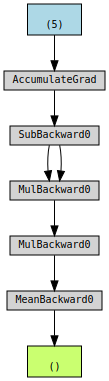

In [53]:
make_dot(a)

### Propagacja wsteczna gradientu

In [54]:
x = torch.ones(1, requires_grad=True)
print(x)
y = (x + 4)**3
y

tensor([1.], requires_grad=True)


tensor([125.], grad_fn=<PowBackward0>)

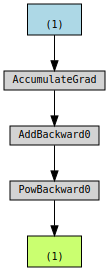

In [55]:
make_dot(y)

In [56]:
y.backward()
x.grad

tensor([75.])

### Obliczenia z pominięciem gradientów

In [57]:
t1 = torch.rand(3, 4, requires_grad=True)
t2 = torch.rand(4, 3, requires_grad=True)
with torch.no_grad():
    y = t1 @ t2
print(y)
print(t1 @ t2)

tensor([[0.1923, 0.7188, 0.6019],
        [0.8556, 1.1538, 0.9481],
        [0.9357, 1.1804, 1.0499]])
tensor([[0.1923, 0.7188, 0.6019],
        [0.8556, 1.1538, 0.9481],
        [0.9357, 1.1804, 1.0499]], grad_fn=<MmBackward>)


### Pochodna w punkcie dla wszystkich źródeł



+ Funkcja backward pozwala nam policzyć pochodną cząstkową w punkcie dla wszystkich źródeł (liści w grafie obliczeń)

In [58]:
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output

In [59]:
w = torch.randn(5, 3, requires_grad=True)  #weights
b = torch.randn(3, requires_grad=True)  #bias

In [60]:
z = torch.matmul(x, w) + b
z

tensor([ 1.9472, -3.5381, -2.4886], grad_fn=<AddBackward0>)

In [61]:
loss = torch.abs((z - y)).mean()
loss

tensor(2.6580, grad_fn=<MeanBackward0>)

In [62]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[ 0.3333, -0.3333, -0.3333],
        [ 0.3333, -0.3333, -0.3333],
        [ 0.3333, -0.3333, -0.3333],
        [ 0.3333, -0.3333, -0.3333],
        [ 0.3333, -0.3333, -0.3333]])
tensor([ 0.3333, -0.3333, -0.3333])


## Regresja - z siecią neuronową

### Przykład
+ Przewidywanie ceny jabłek i śliwek, gdy mamy podaną liczbę kupionych jabłek i śliwek i cenę za cały koszyk.

In [63]:
apples_kg_ordered = [2, 4, 7, 3, 13]
plums_kg_ordered = [3, 8, 9, 1, 1]
prices = [11.97, 28.05, 38.98, 10.96, 41.1]

+ Przygotowanie tensorów:

In [64]:
X = torch.tensor([apples_kg_ordered, plums_kg_ordered])
Y = torch.tensor(prices)
X = X.T.float()
Y = Y.T
print(X)
print(Y)

tensor([[ 2.,  3.],
        [ 4.,  8.],
        [ 7.,  9.],
        [ 3.,  1.],
        [13.,  1.]])
tensor([11.9700, 28.0500, 38.9800, 10.9600, 41.1000])


+ Parametry podlegające optymalizacji:

In [65]:
params = torch.rand(2, requires_grad=True)
params

tensor([0.4614, 0.5743], requires_grad=True)

+ Graf obliczeń:

In [66]:
y_pred = X @ params
y_pred

tensor([2.6456, 6.4398, 8.3983, 1.9585, 6.5725], grad_fn=<MvBackward>)

+ Strata:

In [67]:
loss = (torch.square(Y - y_pred)).mean()
loss

tensor(552.4707, grad_fn=<MeanBackward0>)

+ Pojedyncza optymalizacja:

In [68]:
loss.backward()

In [69]:
params.grad

tensor([-318.0090, -207.8473])

In [70]:
lr = 0.001

In [71]:
print(params)
params - lr * params.grad

tensor([0.4614, 0.5743], requires_grad=True)


tensor([0.7794, 0.7821], grad_fn=<SubBackward0>)

+ Spięcie wszystkiego w jedność i wykonanie 50 epok:

In [72]:
params = torch.rand(2, requires_grad=True)

In [73]:
for epoch in range(50):
    y_pred = X @ params
    loss = (torch.square(Y - y_pred)).mean()
    loss.backward()
    with torch.no_grad():
        params.copy_(params - lr * params.grad)
    print(f"Param values: {params[0]:.5}, {params[1]:.5}",
          f"Gradients: {params.grad[0]:.4}, {params.grad[1]:.4} ")
    #     print()
    params.grad.zero_()

Param values: 1.2525, 0.55613 Gradients: -277.3, -197.2 
Param values: 1.4932, 0.72809 Gradients: -240.7, -172.0 
Param values: 1.7021, 0.87805 Gradients: -208.9, -150.0 
Param values: 1.8833, 1.0089 Gradients: -181.2, -130.8 
Param values: 2.0405, 1.1231 Gradients: -157.2, -114.2 
Param values: 2.1768, 1.2228 Gradients: -136.3, -99.7 
Param values: 2.295, 1.3099 Gradients: -118.2, -87.1 
Param values: 2.3974, 1.386 Gradients: -102.4, -76.14 
Param values: 2.4861, 1.4526 Gradients: -88.74, -66.59 
Param values: 2.563, 1.5109 Gradients: -76.86, -58.28 
Param values: 2.6295, 1.5619 Gradients: -66.54, -51.05 
Param values: 2.6871, 1.6067 Gradients: -57.58, -44.75 
Param values: 2.7369, 1.6459 Gradients: -49.79, -39.26 
Param values: 2.7799, 1.6804 Gradients: -43.04, -34.48 
Param values: 2.8171, 1.7107 Gradients: -37.17, -30.32 
Param values: 2.8492, 1.7374 Gradients: -32.08, -26.69 
Param values: 2.8769, 1.7609 Gradients: -27.66, -23.52 
Param values: 2.9007, 1.7817 Gradients: -23.83, -2

### Zadanie
+ Tym razem na innym targu do ceny owoców doliczany jest stały koszt reklamówki. Napisz model regresji liniowej który oszacuje cenę kg ziemniaków, pomidorów i reklamówki

In [74]:
potatoes_kg_ordered = [1, 3, 7, 3, 10, 6, 8, 4, 3, 1, 2, 0]
tomatoes_kg_ordered = [5, 2, 3, 1, 2, 3, 6, 7, 3, 2, 3, 1]
prices = [
    22.37, 14.45, 26.6, 10.44, 28.49, 24.52, 40.38, 36.51, 18.50, 10.46, 16.51,
    4.58
]

In [75]:
params = torch.rand(2, requires_grad=True)
param_bagprice = torch.rand(1, requires_grad=True)
lr = 0.001

In [76]:
X = torch.tensor([potatoes_kg_ordered, tomatoes_kg_ordered])
Y = torch.tensor(prices)
X = X.T.float()
Y = Y.T
print(X)
print(Y)

tensor([[ 1.,  5.],
        [ 3.,  2.],
        [ 7.,  3.],
        [ 3.,  1.],
        [10.,  2.],
        [ 6.,  3.],
        [ 8.,  6.],
        [ 4.,  7.],
        [ 3.,  3.],
        [ 1.,  2.],
        [ 2.,  3.],
        [ 0.,  1.]])
tensor([22.3700, 14.4500, 26.6000, 10.4400, 28.4900, 24.5200, 40.3800, 36.5100,
        18.5000, 10.4600, 16.5100,  4.5800])


In [77]:
for epoch in range(10000):
    y_pred = X @ params + param_bagprice
    loss = (torch.square(Y - y_pred)).mean()
    loss.backward()
    with torch.no_grad():
        params.copy_(params - lr * params.grad)
        param_bagprice.copy_(param_bagprice - lr * param_bagprice.grad)
    if epoch % 200 == 1:
        print(
            f"Param values: {params[0]:.5}, {params[1]:.5}, {param_bagprice[0]:.5}",
            f"Gradients: {params.grad[0]:.4}, {params.grad[1]:.4}, {param_bagprice.grad[0]:.5}"
        )
    params.grad.zero_()
    param_bagprice.grad.zero_()

Param values: 0.92815, 0.68461, 0.72325 Gradients: -154.4, -124.3, -31.179
Param values: 2.1744, 3.5371, 1.2318 Gradients: 1.835, -2.727, -0.044413
Param values: 1.9982, 3.8063, 1.2083 Gradients: 0.3331, -0.5526, 0.20645
Param values: 1.9676, 3.8643, 1.1625 Gradients: 0.04985, -0.1387, 0.23795
Param values: 1.9643, 3.8818, 1.1155 Gradients: -0.002744, -0.05779, 0.22914
Param values: 1.9661, 3.8912, 1.0712 Gradients: -0.01179, -0.04014, 0.21381
Param values: 1.9686, 3.8986, 1.03 Gradients: -0.01269, -0.03465, 0.19825
Param values: 1.971, 3.9052, 0.99188 Gradients: -0.01206, -0.03159, 0.18359
Param values: 1.9734, 3.9113, 0.95655 Gradients: -0.01123, -0.02916, 0.16997
Param values: 1.9755, 3.9169, 0.92384 Gradients: -0.01042, -0.02699, 0.15735
Param values: 1.9775, 3.9221, 0.89356 Gradients: -0.009651, -0.02499, 0.14567
Param values: 1.9794, 3.9269, 0.86552 Gradients: -0.008941, -0.02314, 0.13485
Param values: 1.9811, 3.9313, 0.83957 Gradients: -0.008269, -0.02141, 0.12484
Param values: 

In [78]:
print(
    f"Potatoes price: {params[0]:.4}\nTomatoes price: {params[1]:.4}\nBag price: {param_bagprice[0]:.5}"
)

Potatoes price: 2.001
Tomatoes price: 3.984
Bag price: 0.53324
